#### 데이터 분석, 시각화
1. 주제 선정 : 마약 연계 범죄 현황 / 심각성

2. 데이터 선정 : kosis.kr 범죄자 마약류 등 상용여부 (경찰청,경찰청범죄통계, 2011~2021, 전국단위)

3. 분석 목표
  * 2011~2021년 내 마약류 관리에 관한 법률 위반 범죄 건수의 증감 추이

4. 데이터 읽어오기, 전처리, 통합 => 단일 df

5. 데이터 탐색 (EDA)

6. 분석 목표별 분석 및 시각화

7. 결론.

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib

matplotlib.rcParams

matplotlib.rcParams['font.family']

current_font_list = matplotlib.rcParams['font.family']

font_path = 'C:\\Windows\\Fonts\\batang.ttc'

kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont] + current_font_list

In [59]:
pd_data = pd.read_csv('범죄자_마약류_등_상용여부_20230419140012.csv', encoding='cp949', header=[3,4])

pd_data.head()

시점  마약류                  본드·신나 등 환각물질 알코올  해당무   미상  마약류  ...   해당무   미상  \
     시점   소계  마약   대마 향정신성의약품           소계  소계   소계   소계 소계.1  ...  소계.1 소계.1   
0  2014  491  27  452      12            -   1  165  252   89  ...   493   40   
1  2015  193  31  158       4            -   -  500  240   13  ...   956   78   
2  2016   91   7   80       4            -   1  746  218   19  ...  1157  129   
3  2017  140   9  122       9            -   1  825  349   30  ...  1234   82   
4  2018  566  17  520      29            0   1  267  355  133  ...  1111  104   

    마약류                     본드·신나 등 환각물질  알코올   해당무    미상  
   소계.2 마약.2 대마.2 향정신성의약품.2         소계.2 소계.2  소계.2  소계.2  
0  2809  363   30      2416            4    1  1061  1476  
1   953  241    6       706            -    1  4005  1937  
2   706  114    6       586            -    1  4890  2031  
3   832  135   14       683            -    -  4895  1973  
4  3291  190   29      3072            0    2  1675  1497  

[5 rows x 25 columns]

In [60]:
pd_data = pd_data.set_index(('시점', '시점'))
pd_data.index.name = '시점'

pd_data

마약류                   본드·신나 등 환각물질 알코올  해당무   미상  마약류       ...   해당무  \
        소계  마약    대마 향정신성의약품           소계  소계   소계   소계 소계.1 마약.1  ...  소계.1   
시점                                                                 ...         
2014   491  27   452      12            -   1  165  252   89   70  ...   493   
2015   193  31   158       4            -   -  500  240   13    8  ...   956   
2016    91   7    80       4            -   1  746  218   19   14  ...  1157   
2017   140   9   122       9            -   1  825  349   30   24  ...  1234   
2018   566  17   520      29            0   1  267  355  133  100  ...  1111   
2019   944  16   896      32            1   1  450  567  170  129  ...  1238   
2020  1148  16  1088      44            -   -  624  568  249  186  ...  1634   
2021  1070  13  1003      54            -   -  718  476  229  190  ...  1098   

       미상   마약류                     본드·신나 등 환각물질  알코올   해당무    미상  
     소계.1  소계.2 마약.2 대마.2 향정신성의약품.2         소계.2 소계.2  소계.2  소계.2  
시점                                                                 
2014   40  2809  363   30      2416            4    1  1061  1476  
2015   78   953  241    6       706            -    1  4005  1937  
2016  129   706  114    6       586            -    1  4890  2031  
2017   82   832  135   14       683            -    -  4895  1973  
2018  104  3291  190   29      3072            0    2  1675  1497  
2019   86  4126  237   77      3812            1    4  2067  1591  
2020  114  4122  255   60      3807            -    3  2935  1873  
2021  125  3808  244   79      3485            -    2  2355  1385  

[8 rows x 24 columns]

In [61]:
pd_data = pd_data.stack(level=0)

pd_data

대마 대마.1  대마.2    마약   마약.1   마약.2    소계  소계.1  소계.2  \
시점                                                                           
2014 마약류            452.0    7  30.0  27.0   70.0  363.0   491    89  2809   
     미상               NaN  NaN   NaN   NaN    NaN    NaN   252    40  1476   
     본드·신나 등 환각물질     NaN  NaN   NaN   NaN    NaN    NaN     -     -     4   
     알코올              NaN  NaN   NaN   NaN    NaN    NaN     1     -     1   
     해당무              NaN  NaN   NaN   NaN    NaN    NaN   165   493  1061   
2015 마약류            158.0    -   6.0  31.0    8.0  241.0   193    13   953   
     미상               NaN  NaN   NaN   NaN    NaN    NaN   240    78  1937   
     본드·신나 등 환각물질     NaN  NaN   NaN   NaN    NaN    NaN     -     -     -   
     알코올              NaN  NaN   NaN   NaN    NaN    NaN     -     -     1   
     해당무              NaN  NaN   NaN   NaN    NaN    NaN   500   956  4005   
2016 마약류             80.0    -   6.0   7.0   14.0  114.0    91    19   706   
     미상               NaN  NaN   NaN   NaN    NaN    NaN   218   129  2031   
     본드·신나 등 환각물질     NaN  NaN   NaN   NaN    NaN    NaN     -     -     -   
     알코올              NaN  NaN   NaN   NaN    NaN    NaN     1     -     1   
     해당무              NaN  NaN   NaN   NaN    NaN    NaN   746  1157  4890   
2017 마약류            122.0    -  14.0   9.0   24.0  135.0   140    30   832   
     미상               NaN  NaN   NaN   NaN    NaN    NaN   349    82  1973   
     본드·신나 등 환각물질     NaN  NaN   NaN   NaN    NaN    NaN     -     -     -   
     알코올              NaN  NaN   NaN   NaN    NaN    NaN     1     -     -   
     해당무              NaN  NaN   NaN   NaN    NaN    NaN   825  1234  4895   
2018 마약류            520.0    4  29.0  17.0  100.0  190.0   566   133  3291   
     미상               NaN  NaN   NaN   NaN    NaN    NaN   355   104  1497   
     본드·신나 등 환각물질     NaN  NaN   NaN   NaN    NaN    NaN     0     0     0   
     알코올              NaN  NaN   NaN   NaN    NaN    NaN     1     1     2   
     해당무              NaN  NaN   NaN   NaN    NaN    NaN   267  1111  1675   
2019 마약류            896.0    6  77.0  16.0  129.0  237.0   944   170  4126   
     미상               NaN  NaN   NaN   NaN    NaN    NaN   567    86  1591   
     본드·신나 등 환각물질     NaN  NaN   NaN   NaN    NaN    NaN     1     -     1   
     알코올              NaN  NaN   NaN   NaN    NaN    NaN     1     -     4   
     해당무              NaN  NaN   NaN   NaN    NaN    NaN   450  1238  2067   
2020 마약류           1088.0    7  60.0  16.0  186.0  255.0  1148   249  4122   
     미상               NaN  NaN   NaN   NaN    NaN    NaN   568   114  1873   
     본드·신나 등 환각물질     NaN  NaN   NaN   NaN    NaN    NaN     -     -     -   
     알코올              NaN  NaN   NaN   NaN    NaN    NaN     -     3     3   
     해당무              NaN  NaN   NaN   NaN    NaN    NaN   624  1634  2935   
2021 마약류           1003.0    4  79.0  13.0  190.0  244.0  1070   229  3808   
     미상               NaN  NaN   NaN   NaN    NaN    NaN   476   125  1385   
     본드·신나 등 환각물질     NaN  NaN   NaN   NaN    NaN    NaN     -     -     -   
     알코올              NaN  NaN   NaN   NaN    NaN    NaN     -     2     2   
     해당무              NaN  NaN   NaN   NaN    NaN    NaN   718  1098  2355   

                   향정신성의약품  향정신성의약품.1  향정신성의약품.2  
시점                                                
2014 마약류              12.0       12.0     2416.0  
     미상                NaN        NaN        NaN  
     본드·신나 등 환각물질      NaN        NaN        NaN  
     알코올               NaN        NaN        NaN  
     해당무               NaN        NaN        NaN  
2015 마약류               4.0        5.0      706.0  
     미상                NaN        NaN        NaN  
     본드·신나 등 환각물질      NaN        NaN        NaN  
     알코올               NaN        NaN        NaN  
     해당무               NaN        NaN        NaN  
2016 마약류               4.0        5.0      586.0  
     미상                NaN        NaN        NaN  
     본드·신나 등 환각물질      NaN      

In [62]:
pd_data = pd_data.reset_index()

pd_data

,시점,level_1,대마,대마.1,대마.2,마약,마약.1,마약.2,소계,소계.1,소계.2,향정신성의약품,향정신성의약품.1,향정신성의약품.2
0,2014,마약류,452.0,7,30.0,27.0,70.0,363.0,491,89,2809,12.0,12.0,2416.0
1,2014,미상,NaN,NaN,NaN,NaN,NaN,NaN,252,40,1476,NaN,NaN,NaN
2,2014,본드·신나 등 환각물질,NaN,NaN,NaN,NaN,NaN,NaN,-,-,4,NaN,NaN,NaN
3,2014,알코올,NaN,NaN,NaN,NaN,NaN,NaN,1,-,1,NaN,NaN,NaN
4,2014,해당무,NaN,NaN,NaN,NaN,NaN,NaN,165,493,1061,NaN,NaN,NaN
5,2015,마약류,158.0,-,6.0,31.0,8.0,241.0,193,13,953,4.0,5.0,706.0
6,2015,미상,NaN,NaN,NaN,NaN,NaN,NaN,240,78,1937,NaN,NaN,NaN
7,2015,본드·신나 등 환각물질,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-,NaN,NaN,NaN
8,2015,알코올,NaN,NaN,NaN,NaN,NaN,NaN,-,-,1,NaN,NaN,NaN
9,2015,해당무,NaN,NaN,NaN,NaN,NaN,NaN,500,956,4005,NaN,NaN,NaN


In [63]:
pd_data = pd_data.replace('-', '0')
pd_data = pd_data.fillna(0)
pd_data = pd_data.astype({'소계': 'float64', '소계.1': 'float64', '소계.2': 'float64'})
pd_data['Total'] = pd_data['소계'] + pd_data['소계.1'] + pd_data['소계.2']

pd_data

,시점,level_1,대마,대마.1,대마.2,마약,마약.1,마약.2,소계,소계.1,소계.2,향정신성의약품,향정신성의약품.1,향정신성의약품.2,Total
0,2014,마약류,452.0,7,30.0,27.0,70.0,363.0,491.0,89.0,2809.0,12.0,12.0,2416.0,3389.0
1,2014,미상,0.0,0,0.0,0.0,0.0,0.0,252.0,40.0,1476.0,0.0,0.0,0.0,1768.0
2,2014,본드·신나 등 환각물질,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0
3,2014,알코올,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
4,2014,해당무,0.0,0,0.0,0.0,0.0,0.0,165.0,493.0,1061.0,0.0,0.0,0.0,1719.0
5,2015,마약류,158.0,0,6.0,31.0,8.0,241.0,193.0,13.0,953.0,4.0,5.0,706.0,1159.0
6,2015,미상,0.0,0,0.0,0.0,0.0,0.0,240.0,78.0,1937.0,0.0,0.0,0.0,2255.0
7,2015,본드·신나 등 환각물질,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2015,알코올,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,2015,해당무,0.0,0,0.0,0.0,0.0,0.0,500.0,956.0,4005.0,0.0,0.0,0.0,5461.0


In [64]:
df1 = pd_data.pivot_table('Total', index='시점', columns='level_1', aggfunc="sum")

df1.columns.name = '범죄종류'

df1['Total'] = df1.sum(axis='columns')
df1

범죄종류,마약류,미상,본드·신나 등 환각물질,알코올,해당무,Total
시점,,,,,,
2014,3389.0,1768.0,4.0,2.0,1719.0,6882.0
2015,1159.0,2255.0,0.0,1.0,5461.0,8876.0
2016,816.0,2378.0,0.0,2.0,6793.0,9989.0
2017,1002.0,2404.0,0.0,1.0,6954.0,10361.0
2018,3990.0,1956.0,0.0,4.0,3053.0,9003.0
2019,5240.0,2244.0,2.0,5.0,3755.0,11246.0
2020,5519.0,2555.0,0.0,6.0,5193.0,13273.0
2021,5107.0,1986.0,0.0,4.0,4171.0,11268.0


Text(0.5, 1.0, '마약류 관리에 관한 법률 증감 추이')

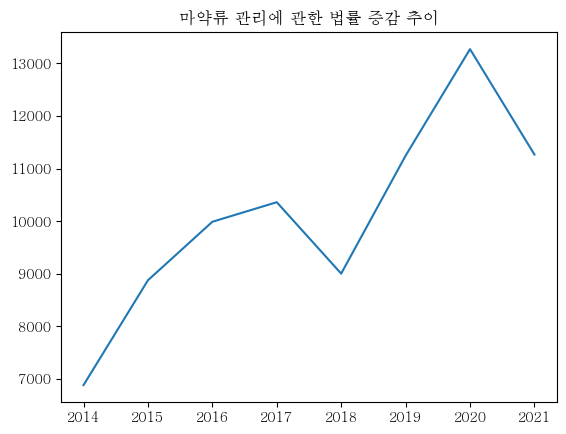

In [65]:
fig, axes = plt.subplots()

# 마약류 관리에 관한 법률 증감 추이
axes.plot(df1.index, df1['Total'])
axes.set_title('마약류 관리에 관한 법률 증감 추이')

In [66]:
df2 = df1.iloc[:, :-1].stack(level=0)
df2 = df2.reset_index()

df2.columns = ('시점', '범죄종류', '건수')

df2

,시점,범죄종류,건수
0,2014,마약류,3389.0
1,2014,미상,1768.0
2,2014,본드·신나 등 환각물질,4.0
3,2014,알코올,2.0
4,2014,해당무,1719.0
5,2015,마약류,1159.0
6,2015,미상,2255.0
7,2015,본드·신나 등 환각물질,0.0
8,2015,알코올,1.0
9,2015,해당무,5461.0


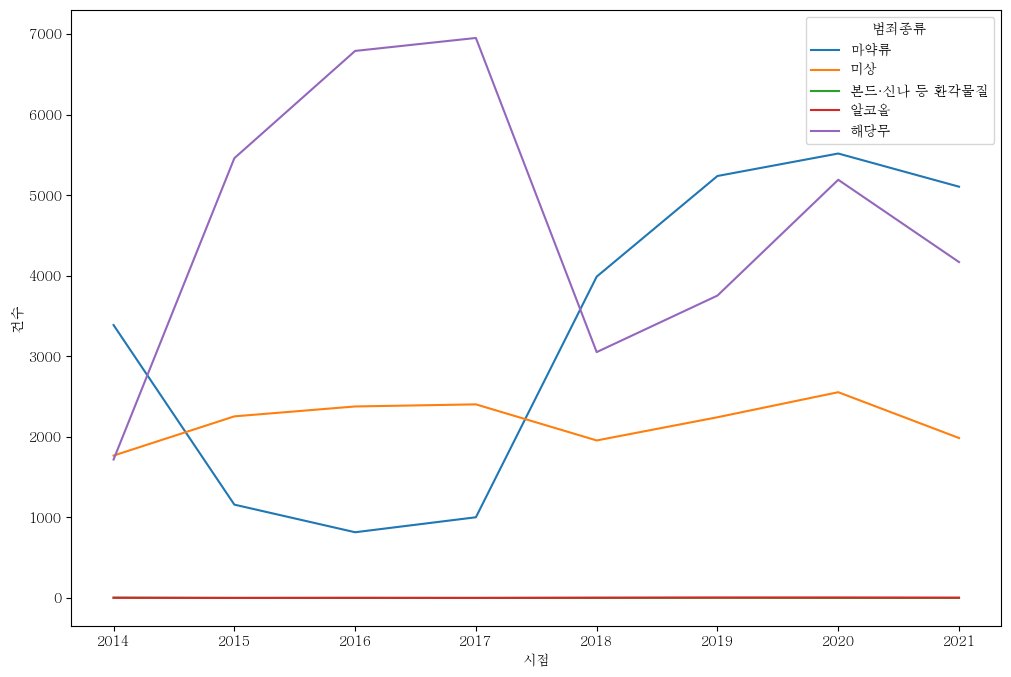

In [67]:
# ax1 = sns.relplot(data=df2, x='시점', y='건수', hue='범죄종류', kind='line')
fig, ax1 = plt.subplots(figsize=(12,8))
ax1 = sns.lineplot(data=df2, x='시점', y='건수', hue='범죄종류')
sns.move_legend(ax1, "upper right")

Text(0.5, 1.0, '2014~2021 년도별 범죄종류별 범죄 건수')

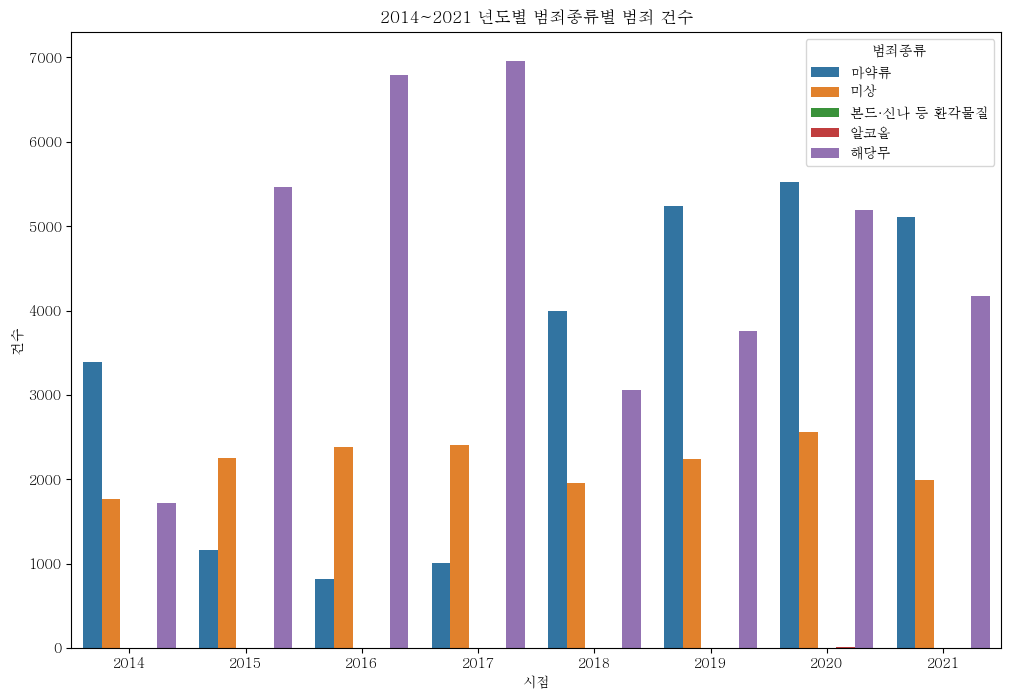

In [68]:
fig, ax2 = plt.subplots(figsize=(12,8))
ax2 = sns.barplot(data=df2, x='시점', y='건수', hue='범죄종류')
ax2.set_title('2014~2021 년도별 범죄종류별 범죄 건수')

[Text(0, 0, '2014'),
 Text(1, 0, '2015'),
 Text(2, 0, '2016'),
 Text(3, 0, '2017'),
 Text(4, 0, '2018'),
 Text(5, 0, '2019'),
 Text(6, 0, '2020'),
 Text(7, 0, '2021')]

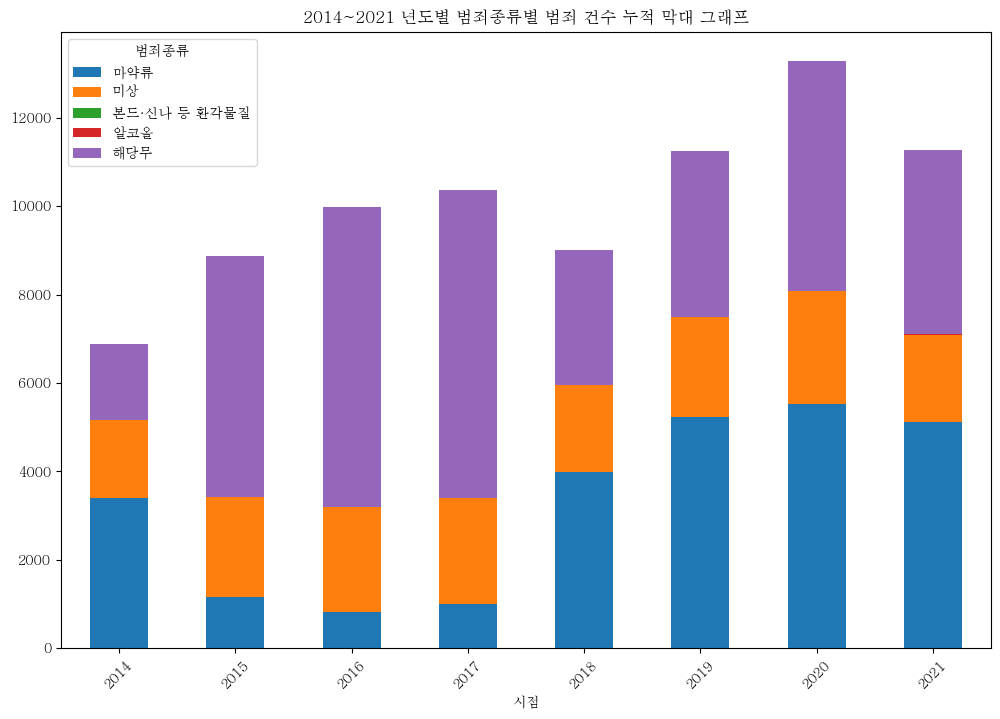

In [69]:
df3 = df2.pivot(index='시점', columns='범죄종류', values='건수')


ax3 = df3.plot.bar(stacked=True, figsize=(12,8))

ax3.set_title('2014~2021 년도별 범죄종류별 범죄 건수 누적 막대 그래프')
ax3.set_xticklabels(df2['시점'].unique(), rotation=45)